In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import ploty.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/8. gurgaon_post_feature_selection.csv', on_bad_lines = 'skip')

df

,property_type,sector,built_up_area,agepossession,bedroom,bathroom,study room,servant room,store room,balcony,furnishing_type,luxury_category,floor_category,price_in_cr
0,flat,Manesar,2233,Moderately Old,4,4,0,0,0,3,Semi-furnished,Low,Mid-rise,0.90
1,house,Sector 48,3229,Moderately Old,4,2,1,1,1,1,Un-furnished,Medium,Low-rise,7.35
2,house,Sector 10A,2367,Moderately Old,4,3,0,0,0,2,Semi-furnished,Low,Low-rise,4.25
3,flat,Sector 81,1300,Relatively New,2,2,0,0,0,3,Semi-furnished,Medium,Mid-rise,0.87
4,flat,Sector 88A,1582,New Property,3,3,0,0,0,3+,Semi-furnished,Medium,High-rise,2.65


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PowerTransformer

##Encoding Categorical Columns

##1.Ordinal Encoding

In [ ]:
numerical_df = df[['built_up_area', 'bedroom', 'bathroom', 'study room', 'servant room', 'store room', 'price_in_cr']]

ordinal_cols = ['property_type', 'agepossession', 'balcony', 'furnishing_type', 'luxury_category', 'floor_category']

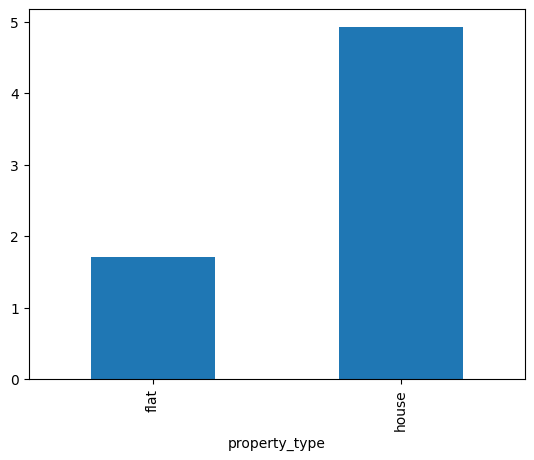

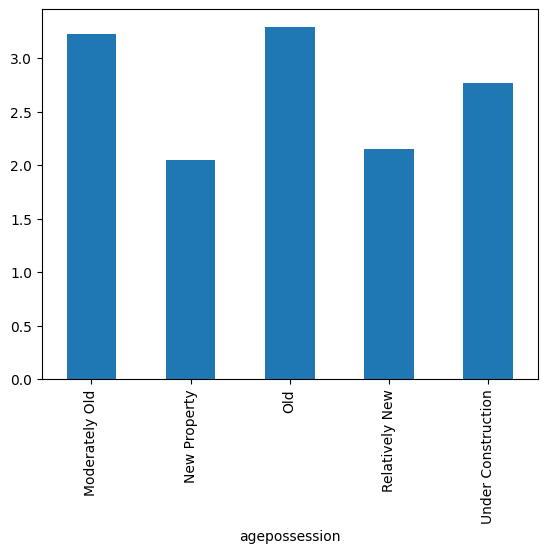

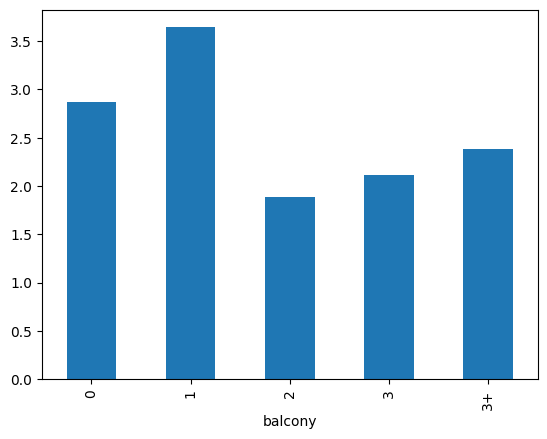

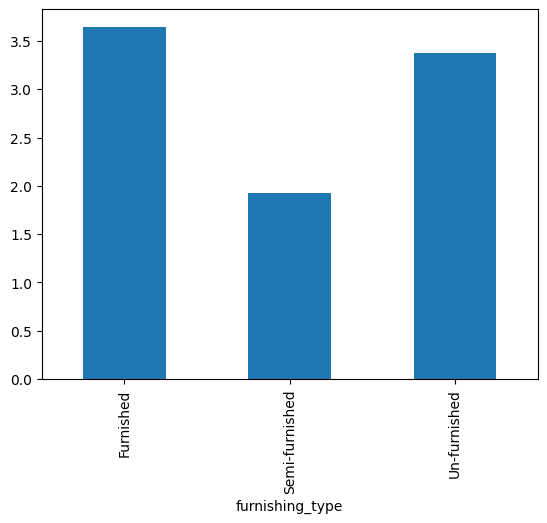

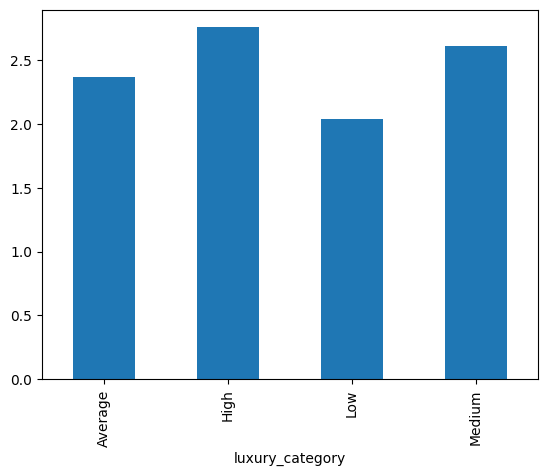

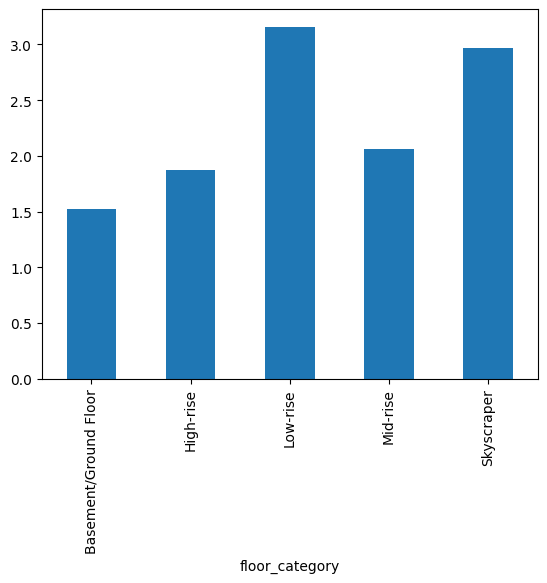

In [ ]:
for i in ordinal_cols:
    temp = df.groupby(i)['price_in_cr'].mean().plot(kind = 'bar')
    plt.show()

In [ ]:
l1 = ['flat', 'house']
l2 = ['New Property', 'Relatively New', 'Under Construction', 'Moderately Old',  'Old' ]
l3 = ['2','3','3+','0','1']
l4 = ['Semi-furnished', 'Un-furnished', 'Furnished']
l5 = ['Low', 'Average', 'Medium', 'High']
l6 = ['Basement/Ground Floor', 'High-rise', 'Mid-rise', 'Skyscraper', 'Low-rise']

oe_categories = [l1,l2,l3,l4,l5,l6]


In [ ]:
ordinal_encoding = OrdinalEncoder(categories = oe_categories, dtype = int, handle_unknown = 'use_encoded_value', unknown_value = -1)

df[ordinal_cols] = ordinal_encoding.fit_transform(df[ordinal_cols])

df.head()

,property_type,sector,built_up_area,agepossession,bedroom,bathroom,study room,servant room,store room,balcony,furnishing_type,luxury_category,floor_category,price_in_cr
0,0,Manesar,2233,3,4,4,0,0,0,1,0,0,2,0.90
1,1,Sector 48,3229,3,4,2,1,1,1,4,1,2,4,7.35
2,1,Sector 10A,2367,3,4,3,0,0,0,0,0,0,4,4.25
3,0,Sector 81,1300,1,2,2,0,0,0,1,0,2,2,0.87
4,0,Sector 88A,1582,0,3,3,0,0,0,2,0,2,1,2.65


## 2.One Hot Encoding - using pandas

In [ ]:
new_df = pd.get_dummies(df, columns = ['sector'], drop_first = True, dtype = int)

new_df.drop(columns = ['price_in_cr'], inplace = True)

new_df

,property_type,built_up_area,agepossession,bedroom,bathroom,study room,servant room,store room,balcony,furnishing_type,...,sector_Sector 9A,sector_Shankar Vihar,sector_Shanti Nagar,sector_Sheetla Colony,sector_Sispal Vihar,sector_Sohna Road,sector_Surat Nagar,sector_Surat Nagar Phase 2,sector_Sushant Lok,sector_West Sector 13
0,0,2233,3,4,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3229,3,4,2,1,1,1,4,1,...,0,0,0,0,0,0,0,0,0,0
2,1,2367,3,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1300,1,2,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1582,0,3,3,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,0,1544,1,3,3,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3635,0,1498,1,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3636,0,1416,3,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3637,1,1217,1,2,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df = pd.concat([new_df, df['price_in_cr']], axis = 1)

new_df

,property_type,built_up_area,agepossession,bedroom,bathroom,study room,servant room,store room,balcony,furnishing_type,...,sector_Shankar Vihar,sector_Shanti Nagar,sector_Sheetla Colony,sector_Sispal Vihar,sector_Sohna Road,sector_Surat Nagar,sector_Surat Nagar Phase 2,sector_Sushant Lok,sector_West Sector 13,price_in_cr
0,0,2233,3,4,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.90
1,1,3229,3,4,2,1,1,1,4,1,...,0,0,0,0,0,0,0,0,0,7.35
2,1,2367,3,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
3,0,1300,1,2,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.87
4,0,1582,0,3,3,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,0,1544,1,3,3,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,1.75
3635,0,1498,1,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.70
3636,0,1416,3,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.60
3637,1,1217,1,2,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.10


## 3.Applying Yeo Johnson Transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer

power_trf = PowerTransformer(method = 'yeo-johnson', standardize = True)

data = power_trf.fit_transform(new_df)

final_df = pd.DataFrame(data, columns = power_trf.feature_names_in_)

final_df.head() # new encoded and (transformed & scaled DataFrame)

,property_type,built_up_area,agepossession,bedroom,bathroom,study room,servant room,store room,balcony,furnishing_type,...,sector_Shankar Vihar,sector_Shanti Nagar,sector_Sheetla Colony,sector_Sispal Vihar,sector_Sohna Road,sector_Surat Nagar,sector_Surat Nagar Phase 2,sector_Sushant Lok,sector_West Sector 13,price_in_cr
0,-0.536363,0.589868,1.222351,1.054389,1.461801,-0.480682,-0.743286,-0.315271,-0.277584,-0.706662,...,-0.016579,-0.02345,-0.016579,-0.016579,-0.217935,-0.02345,-0.02345,-0.02345,-0.016579,-0.718280
1,1.864407,1.261562,1.222351,1.054389,-0.678613,2.080376,1.345377,3.171875,1.505488,1.373655,...,-0.016579,-0.02345,-0.016579,-0.016579,-0.217935,-0.02345,-0.02345,-0.02345,-0.016579,1.684402
2,1.864407,0.695166,1.222351,1.054389,0.436389,-0.480682,-0.743286,-0.315271,-1.466853,-0.706662,...,-0.016579,-0.02345,-0.016579,-0.016579,-0.217935,-0.02345,-0.02345,-0.02345,-0.016579,1.186902
3,-0.536363,-0.372835,-0.087144,-1.021723,-0.678613,-0.480682,-0.743286,-0.315271,-0.277584,-0.706662,...,-0.016579,-0.02345,-0.016579,-0.016579,-0.217935,-0.02345,-0.02345,-0.02345,-0.016579,-0.760790
4,-0.536363,-0.026529,-1.470503,0.097505,0.436389,-0.480682,-0.743286,-0.315271,0.480098,-0.706662,...,-0.016579,-0.02345,-0.016579,-0.016579,-0.217935,-0.02345,-0.02345,-0.02345,-0.016579,0.660652


In [ ]:
power_trf.lambdas_[-1]

-0.7303711985921635

## 4.Independent and Dependent Variable

In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

## 5.Using Linear Regression with cross_val_score to check performance

In [ ]:
kfold = KFold(n_splits = 10, shuffle = True)

r2 = cross_val_score(LinearRegression(), X, y, cv = kfold, scoring = 'r2', n_jobs = -1)
mae = - np.mean(cross_val_score(LinearRegression(), X, y, cv = kfold, scoring = 'neg_mean_absolute_error', n_jobs = -1))

print(r2.mean(), r2.std(), mae)


0.870728187547438 0.012471016934498303 0.2626452471089052


## 6.Using Ridge and Lasso Regression to check performance

In [ ]:
params = {'alpha':np.linspace(0,2,20).tolist()}

l_gscv = GridSearchCV(Lasso(), param_grid = params, cv = kfold, scoring = 'r2', n_jobs = -1)

l_gscv.fit(X,y)

print(l_gscv.best_params_)
print(l_gscv.best_score_)


{'alpha': 0.10526315789473684}
0.726463651043964


In [ ]:
params = {'alpha':np.linspace(0,2,20).tolist()}

r_gscv = GridSearchCV(Ridge(), param_grid = params, cv = kfold, scoring = 'r2', n_jobs = -1)

r_gscv.fit(X,y)

print(r_gscv.best_params_)
print(r_gscv.best_score_)


{'alpha': 0.10526315789473684}
0.8706581878027599


## 7.Building Model using Linear Regression

In [ ]:
model = LinearRegression()

model.fit(X,y)

LinearRegression()

In [ ]:
# coef_df = pd.DataFrame(data = model.coef_.reshape(1,155), columns = model.feature_names_in_)

# coef_df = coef_df.T.reset_index().rename(columns ={'index':'feature',0:'coef_value'})#.sort_values(by = 'coef_value', ascending = False)

# coef_df.reset_index(drop = True, inplace = True)

# coef_df


# 8.Using statsmodels

In [ ]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            price_in_cr   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     174.8
Date:                Sat, 01 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:07:04   Log-Likelihood:                -1210.7
No. Observations:                3639   AIC:                             2733.
Df Residuals:                    3483   BIC:                             3701.
Df Model:                         155                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
significant_features = model.pvalues[model.pvalues <= 0.05].index.tolist()

print(significant_features)

# significant_features are those who have P|t| <= 0.05

X_final = X[significant_features]

In [ ]:
X_final.head()

,property_type,built_up_area,agepossession,bedroom,bathroom,study room,servant room,balcony,furnishing_type,luxury_category,...,sector_Sector 61,sector_Sector 62,sector_Sector 63,sector_Sector 63A,sector_Sector 65,sector_Sector 66,sector_Sector 67,sector_Sector 92,sector_Sector 95,sector_Sushant Lok
0,-0.536363,0.589868,1.222351,1.054389,1.461801,-0.480682,-0.743286,-0.277584,-0.706662,-1.433765,...,-0.108057,-0.066455,-0.062146,-0.064336,-0.155579,-0.105424,-0.114388,-0.167231,-0.123879,-0.02345
1,1.864407,1.261562,1.222351,1.054389,-0.678613,2.080376,1.345377,1.505488,1.373655,0.624364,...,-0.108057,-0.066455,-0.062146,-0.064336,-0.155579,-0.105424,-0.114388,-0.167231,-0.123879,-0.02345
2,1.864407,0.695166,1.222351,1.054389,0.436389,-0.480682,-0.743286,-1.466853,-0.706662,-1.433765,...,-0.108057,-0.066455,-0.062146,-0.064336,-0.155579,-0.105424,-0.114388,-0.167231,-0.123879,-0.02345
3,-0.536363,-0.372835,-0.087144,-1.021723,-0.678613,-0.480682,-0.743286,-0.277584,-0.706662,0.624364,...,-0.108057,-0.066455,-0.062146,-0.064336,-0.155579,-0.105424,-0.114388,-0.167231,-0.123879,-0.02345
4,-0.536363,-0.026529,-1.470503,0.097505,0.436389,-0.480682,-0.743286,0.480098,-0.706662,0.624364,...,-0.108057,-0.066455,-0.062146,-0.064336,-0.155579,-0.105424,-0.114388,-0.167231,-0.123879,-0.02345


##To check for Multi-Collinearity

### 1.Correlation

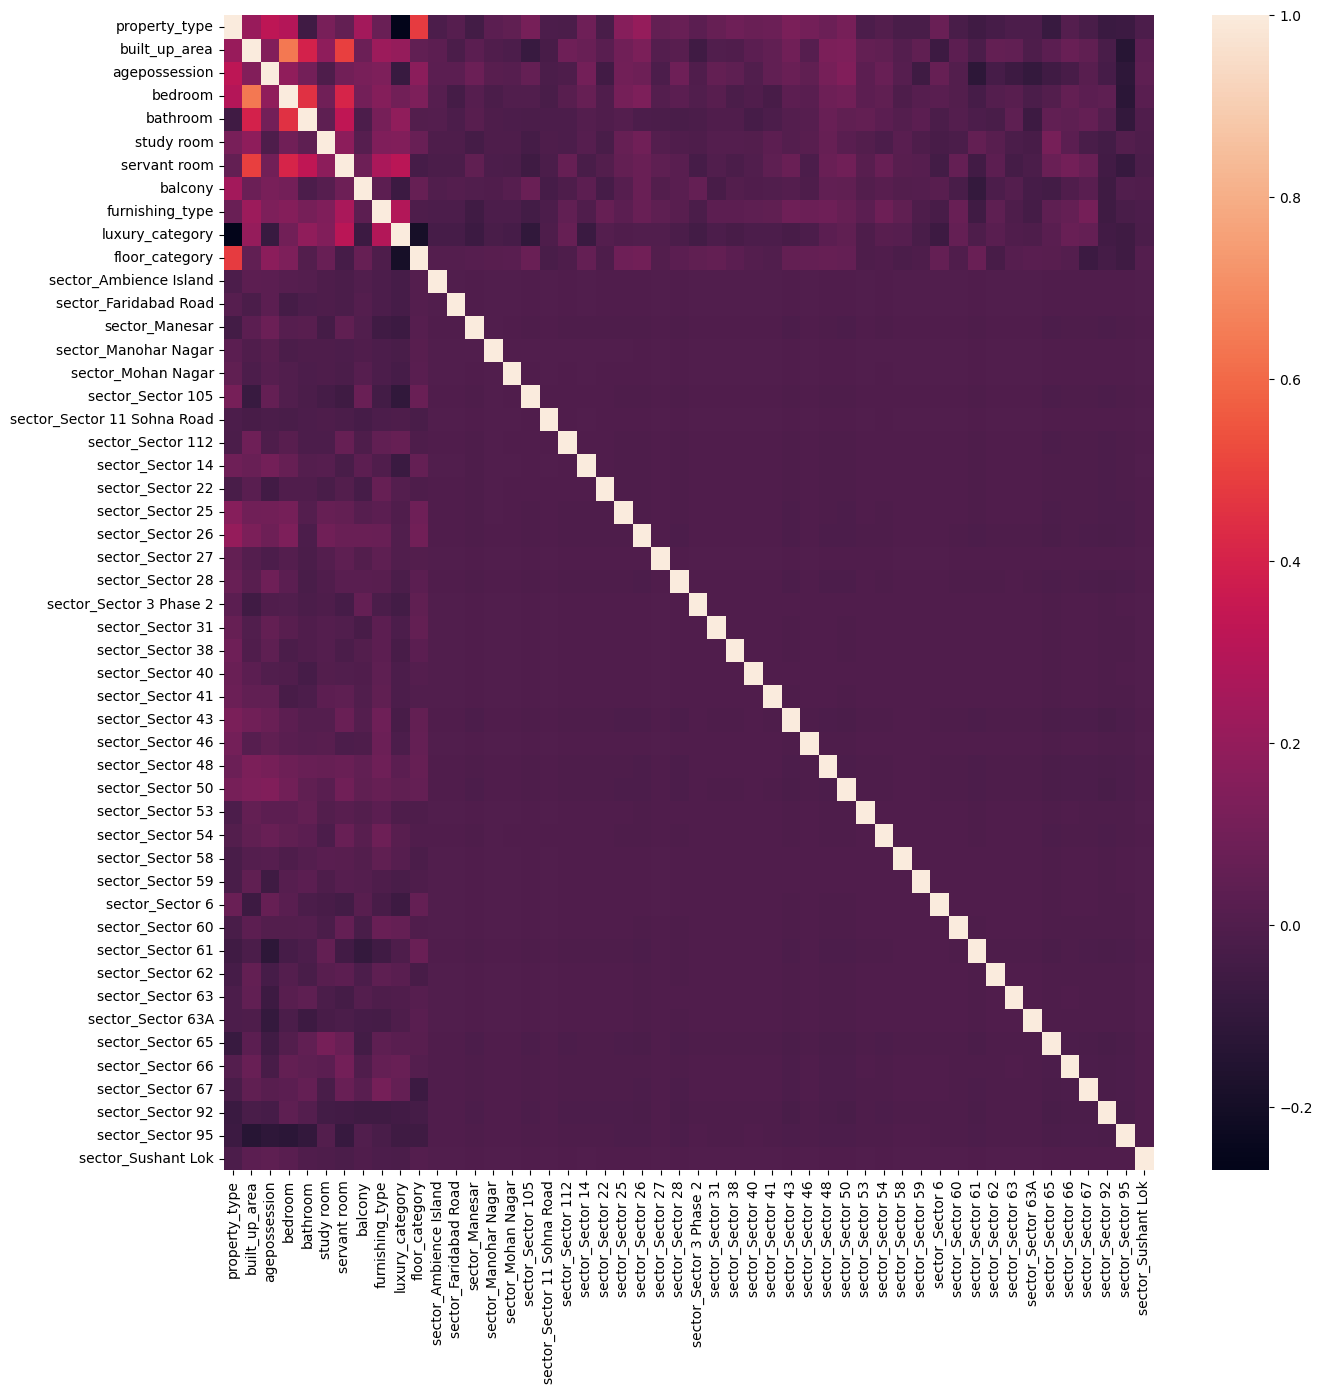

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_final.corr())
plt.show()

### 2.Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_values = []

for i in range(X_final.shape[1]):
    vif_values.append(np.round(vif(X_final,i),3))

vif_df = pd.Series(vif_values, index = X_final.columns).reset_index().rename(columns ={0:'vif'})
vif_df

# No Multi-Collinearity


,index,vif
0,property_type,2.003
1,built_up_area,2.194
2,agepossession,1.294
3,bedroom,2.115
4,bathroom,1.436
5,study room,1.128
6,servant room,1.558
7,balcony,1.107
8,furnishing_type,1.250
9,luxury_category,1.396


### 3.Condition No.

In [ ]:
X_with_const = sm.add_constant(X_final)

model = sm.OLS(y, X_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            price_in_cr   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     384.8
Date:                Sat, 01 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:07:08   Log-Likelihood:                -1796.6
No. Observations:                3639   AIC:                             3695.
Df Residuals:                    3588   BIC:                             4011.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

OBSERVATIONS-

1. All features are statistically significant, as all have p-values (P|t|) ≤ 0.05.
2. No / Minimal multicollinearity is present, evidenced by a Condition Number which is below 10, along with low VIF values and correlations < 0.8 among features.
3. The coefficient values are reliable and can be confidently interpreted.
Therfore we can truly rely on coefficients values








# 9.Finally

In [ ]:
model = LinearRegression()

model.fit(X_final,y)

coef_df = pd.DataFrame(data = model.coef_.reshape(1,X_final.shape[1]), columns = model.feature_names_in_)

coef_df = coef_df.T.reset_index().rename(columns ={'index':'feature',0:'standardized_coefs'})#.sort_values(by = 'coef_value', ascending = False)

coef_df.reset_index(drop = True, inplace = True)

coef_df


,feature,standardized_coefs
0,property_type,0.203624
1,built_up_area,0.563979
2,agepossession,-0.028138
3,bedroom,0.104180
4,bathroom,0.040620
5,study room,0.018236
6,servant room,0.076735
7,balcony,-0.051060
8,furnishing_type,0.039218
9,luxury_category,0.040136


# 10. Calculating Unstandardized regression coeffecients

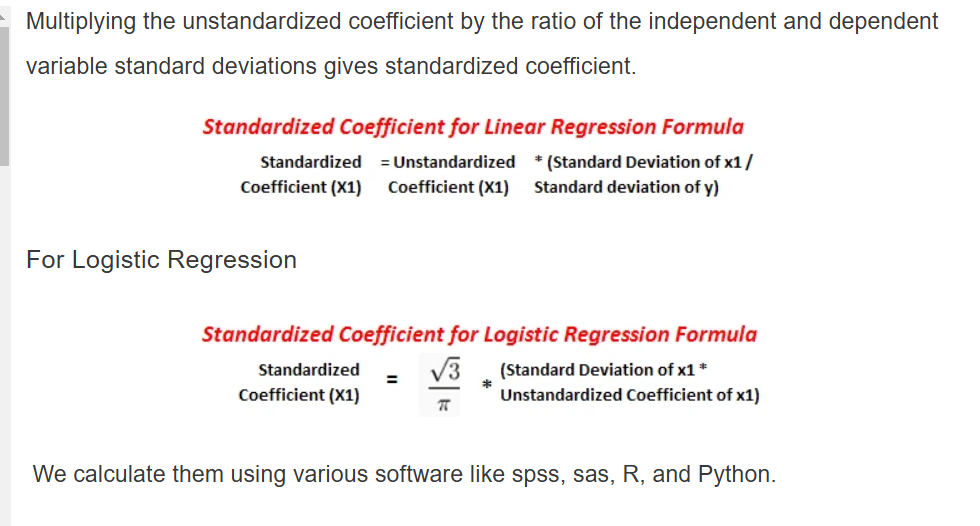

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/stand_vs_unstand_coeff.png')
cv2_imshow(image)

In [ ]:
coef_df[coef_df['feature'] == 'bedroom']['standardized_coefs'].values[0]

0.10418041228449272

In [ ]:
std_y = new_df['price_in_cr'].std() # DataFrame without any transformation

std_x = new_df['bedroom'].std() # DataFrame without any transformation

std_coef = coef_df[coef_df['feature'] == 'bedroom']['standardized_coefs'].values[0]

std_coef * (std_y/std_x)


0.29608483197680086

In [ ]:
std_y = new_df['price_in_cr'].std() # DataFrame without any transformation

std_x = new_df['built_up_area'].std() # DataFrame without any transformation

std_coef = coef_df[coef_df['feature'] == 'built_up_area']['standardized_coefs'].values[0]

std_coef * (std_y/std_x)


0.001309093716369978

In [ ]:
cols = coef_df['feature'].values.tolist()

unstandardized_coefs = []

for i in cols:

    std_y = new_df['price_in_cr'].std()
    std_x = new_df[i].std()

    std_coef = coef_df[coef_df['feature'] == i]['standardized_coefs'].values[0]

    unstandardized_coefs.append(std_coef * (std_y/std_x))


In [ ]:
temp = pd.DataFrame(unstandardized_coefs, columns = ['unstandardized_coefs'])

coef_df = pd.concat([coef_df, temp], axis = 1)

coef_df


,feature,standardized_coefs,unstandardized_coefs
0,property_type,0.203624,1.347350
1,built_up_area,0.563979,0.001309
2,agepossession,-0.028138,-0.061368
3,bedroom,0.104180,0.296085
4,bathroom,0.040620,0.123943
5,study room,0.018236,0.128721
6,servant room,0.076735,0.441733
7,balcony,-0.051060,-0.104167
8,furnishing_type,0.039218,0.184007
9,luxury_category,0.040136,0.110202


In [ ]:
print(f'1sqft built_up_area add up -> price increases by : {0.001309:.4f} Lakhs')

print(f'100sqft built_up_area add up -> price increases by : {(0.001309*100):.3f} Lakhs')

print(f'500sqft built_up_area add up -> price increases by : {(0.001309*500):.3f} Lakhs')


1sqft built_up_area add up -> price increases by : 0.0013 Lakhs
100sqft built_up_area add up -> price increases by : 0.131 Lakhs
500sqft built_up_area add up -> price increases by : 0.654 Lakhs
